In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

import random
from IPython.display import HTML

import cartopy.feature as cfeature

from herbie import Herbie_latest, FastHerbie, Herbie
from toolbox import EasyMap, pc, ccrs
import metpy
from metpy.units import units
from paint.standard2 import cm_tmp

from pyart.graph import cm_colorblind 
import xmovie
# I like Py-ART's colorblind freindly colormaps

In [2]:
FH = FastHerbie(["2023-01-15 12:00"], model="hrrr", fxx=range(0,47))
FH.objects

[▌▌Herbie HRRR model sfc product initialized 2023-Jan-15 12:00 UTC F00 ┊ source=aws,
 ▌▌Herbie HRRR model sfc product initialized 2023-Jan-15 12:00 UTC F01 ┊ source=aws,
 ▌▌Herbie HRRR model sfc product initialized 2023-Jan-15 12:00 UTC F02 ┊ source=aws,
 ▌▌Herbie HRRR model sfc product initialized 2023-Jan-15 12:00 UTC F03 ┊ source=aws,
 ▌▌Herbie HRRR model sfc product initialized 2023-Jan-15 12:00 UTC F04 ┊ source=aws,
 ▌▌Herbie HRRR model sfc product initialized 2023-Jan-15 12:00 UTC F05 ┊ source=aws,
 ▌▌Herbie HRRR model sfc product initialized 2023-Jan-15 12:00 UTC F06 ┊ source=aws,
 ▌▌Herbie HRRR model sfc product initialized 2023-Jan-15 12:00 UTC F07 ┊ source=aws,
 ▌▌Herbie HRRR model sfc product initialized 2023-Jan-15 12:00 UTC F08 ┊ source=aws,
 ▌▌Herbie HRRR model sfc product initialized 2023-Jan-15 12:00 UTC F09 ┊ source=aws,
 ▌▌Herbie HRRR model sfc product initialized 2023-Jan-15 12:00 UTC F10 ┊ source=aws,
 ▌▌Herbie HRRR model sfc product initialized 2023-Jan-15 12:00 UT

In [3]:
%%capture 
#Handles warnings..

FH.download("(TMP|RH):2 m") #This needs a good (and cheap) internet connection... ~1m on my connection

In [4]:
%%capture 
#Handles warnings..

ds = FH.xarray("(TMP|RH):2 m", remove_grib=True)


In [5]:
ds

<xarray.Dataset>
Dimensions:              (step: 47, y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 2023-01-15T12:00:00
  * step                 (step) timedelta64[ns] 00:00:00 ... 1 days 22:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude            (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time           (step) datetime64[ns] 2023-01-15T12:00:00 ... 2023-0...
Dimensions without coordinates: y, x
Data variables:
    t2m                  (step, y, x) float32 292.5 292.5 292.5 ... 274.7 274.8
    r2                   (step, y, x) float32 66.9 67.0 67.0 ... 94.6 94.9 95.0
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    searchString:            (TMP|RH):2 m

In [6]:
dp = metpy.calc.dewpoint_from_relative_humidity(ds.t2m * units.kelvin, ds.r2 * units.percent)
ds['dp'] = dp

In [7]:
dsi = ds.herbie.nearest_points([(-87.6298, 41.8781), (-87.9789, 41.7183), (-87.9646831, 41.8031498)], 
                               names=["Chicago", "Argonne", "Barn"])
dsi

/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/metpy/xarray.py:382: UserWarning: More than one time coordinate present for variable "dp".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/metpy/xarray.py:382: UserWarning: More than one time coordinate present for variable "t2m".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/metpy/xarray.py:382: UserWarning: More than one time coordinate present for variable "r2".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/metpy/xarray.py:382: UserWarning: More than one time coordinate present for variable "dp".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


Magnitude,[[-4.085113525390625 -4.504180908203125 -4.776580810546875 -5.365020751953125 -5.161895751953125 -4.24005126953125 -3.257354736328125 -2.69561767578125 -2.32611083984375 -2.070831298828125 -1.85406494140625 -1.709014892578125 -1.968170166015625 -1.550506591796875 -1.560821533203125 -1.459991455078125 -1.391998291015625 -1.671844482421875 -1.63385009765625 -1.434417724609375 -1.41912841796875 -1.288055419921875 -1.28582763671875 -1.252685546875 -0.99395751953125 -0.66070556640625 -0.413543701171875 -0.4527587890625 -0.1414794921875 0.046142578125 0.218963623046875 0.28607177734375 0.580352783203125 0.77545166015625 0.64239501953125 0.846527099609375 1.24053955078125 1.505035400390625 1.701568603515625 2.1409912109375 3.22589111328125 3.826446533203125 2.406341552734375 0.87127685546875 0.39227294921875 0.358367919921875 0.224090576171875] [-5.265289306640625 -5.717193603515625 -6.106689453125 -5.6219482421875 -4.836578369140625 -3.663177490234375 -2.338958740234375 -1.69537353515625 -1.38079833984375 -1.110870361328125 -1.26678466796875 -1.7708740234375 -1.690093994140625 -1.57769775390625 -1.645660400390625 -2.080963134765625 -2.297637939453125 -2.464569091796875 -2.704833984375 -2.353057861328125 -2.090728759765625 -1.840545654296875 -1.584442138671875 -1.348236083984375 -0.75885009765625 0.288238525390625 1.00079345703125 1.939666748046875 2.857696533203125 3.26788330078125 4.75994873046875 5.033966064453125 5.93670654296875 5.97412109375 6.3280029296875 6.80303955078125 7.488525390625 7.802825927734375 8.12078857421875 8.378021240234375 8.733489990234375 7.03265380859375 5.6181640625 5.23052978515625 4.992279052734375 4.786102294921875 4.53857421875] [-5.204376220703125 -5.79620361328125 -6.177001953125 -5.5784912109375 -4.715545654296875 -3.4697265625 -2.370758056640625 -1.973114013671875 -1.458160400390625 -1.210723876953125 -1.53973388671875 -2.053863525390625 -1.90130615234375 -1.7498779296875 -1.7677001953125 -2.09368896484375 -2.2269287109375 -2.6688232421875 -2.835235595703125 -2.4637451171875 -2.204986572265625 -2.006805419921875 -1.690704345703125 -1.45550537109375 -0.89105224609375 0.1141357421875 0.88946533203125 1.939422607421875 2.9361572265625 3.329986572265625 4.633392333984375 5.143524169921875 6.042938232421875 5.9732666015625 6.310302734375 6.756256103515625 7.38006591796875 7.740814208984375 8.044677734375 8.39520263671875 8.736602783203125 7.061492919921875 5.4029541015625 5.24676513671875 4.900482177734375 4.66143798828125 4.4766845703125]]
Units,degree_Celsius


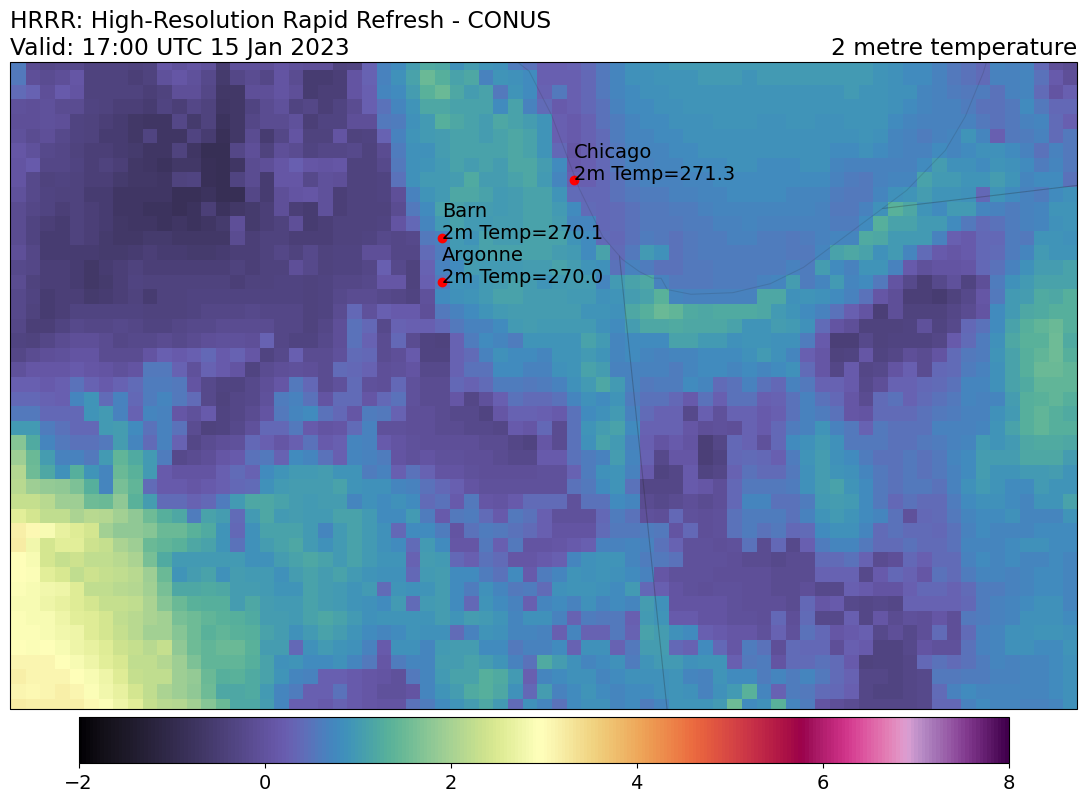

In [10]:

ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[15, 10]).STATES().ax

p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.t2m[5] - 273.15,
    transform=pc,
    cmap=cm_colorblind.ChaseSpectral,
    vmin=-2, vmax=8
)

plt.scatter(dsi.longitude, dsi.latitude, transform=pc, marker='o', color='r')

for i in dsi.t2m.isel(step=0):
    plt.text(
        i.longitude.item(),
        i.latitude.item(),
        f"{i.point.item()}\n2m Temp={i.item():.1f}",
        transform=pc,
    )

plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    shrink=0.8
)

ax.set_title(
    f"{ds.model.upper()}: {ds.description}\nValid: {ds.valid_time[5].dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.t2m.GRIB_name, loc="right")
ax.set_extent([-89, -86.5, 41, 42], crs=pc)

In [12]:
dsi.t2m.isel(step=0)

<xarray.DataArray 't2m' (point: 3)>
array([271.28168, 269.96918, 270.09418], dtype=float32)
Coordinates:
    time               datetime64[ns] 2023-01-15T12:00:00
    step               timedelta64[ns] 00:00:00
    heightAboveGround  float64 2.0
    latitude           (point) float64 41.88 41.71 41.79
    longitude          (point) float64 272.4 272.0 272.0
    valid_time         datetime64[ns] 2023-01-15T12:00:00
    metpy_crs          object Projection: lambert_conformal_conic
    y                  (point) float64 4.197e+05 3.987e+05 4.077e+05
    x                  (point) float64 8.185e+05 7.915e+05 7.915e+05
  * point              (point) <U7 'Chicago' 'Argonne' 'Barn'
Attributes: (12/36)
    GRIB_paramId:                             167
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1905141
    GRIB_typeOfLevel:                         heightAboveGround
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           2t
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            air_temperature
    grid_mapping:                             gribfile_projection

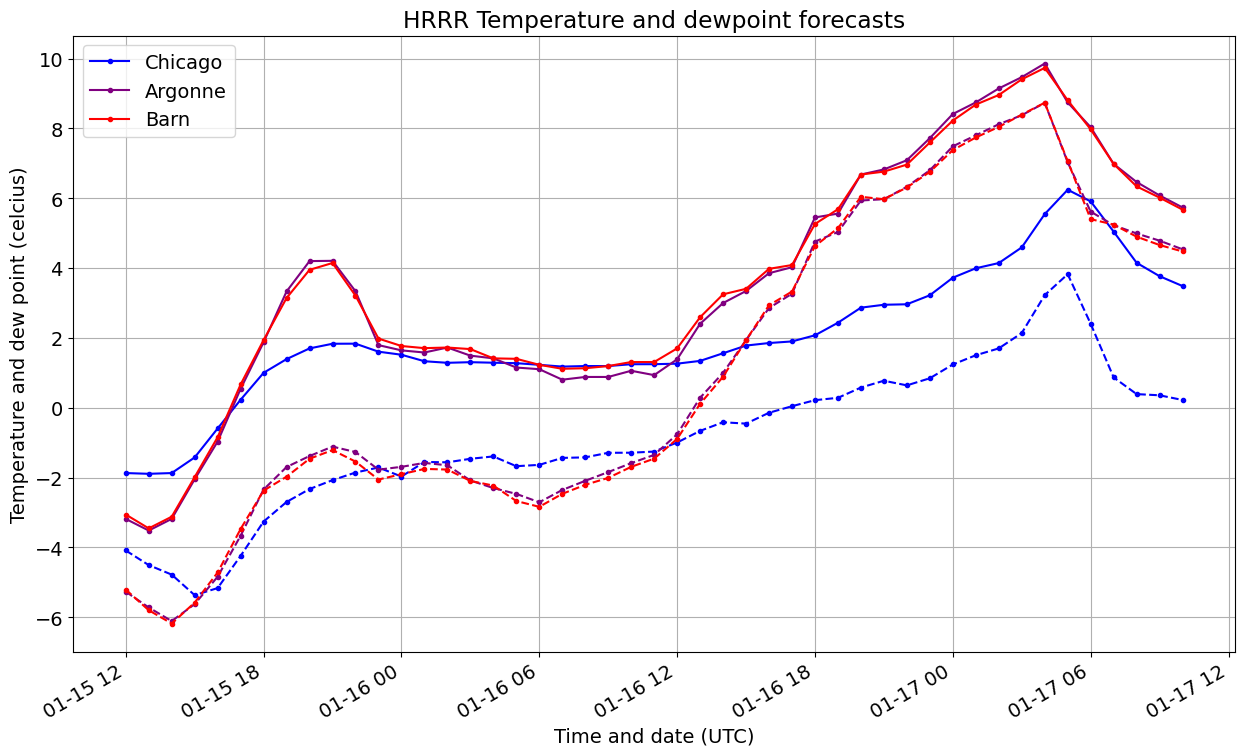

In [13]:
plt.figure(figsize=[15,8])
(dsi.t2m - 273.15).isel(point=0).plot(color='blue', x="valid_time", marker=".", label=dsi.point[0].values)
(dsi.t2m - 273.15).isel(point=1).plot(color='purple', x="valid_time", marker=".", label=dsi.point[1].values)
(dsi.t2m - 273.15).isel(point=2).plot(color='red', x="valid_time", marker=".", label=dsi.point[2].values)

dsi.dp.isel(point=0).plot(color='blue', x="valid_time", marker=".", linestyle='dashed')
dsi.dp.isel(point=1).plot(color='purple', x="valid_time", marker=".", linestyle='dashed')
dsi.dp.isel(point=2).plot(color='red', x="valid_time", marker=".", linestyle='dashed')

plt.grid()
plt.ylabel('Temperature and dew point (celcius)')
plt.xlabel('Time and date (UTC)')
plt.title('HRRR Temperature and dewpoint forecasts')


plt.legend()

In [72]:
def custom_plotfunc(movie_ds, fig, tt, *args, **kwargs):
    #nfig = plt.figure(figsize=[16,8])
    movie_dsi = kwargs['movie_dsi']
    ax = fig.subplots( ncols=1, subplot_kw={'projection' : movie_ds.herbie.crs})
    p = ax.pcolormesh(
            movie_ds.longitude,
            movie_ds.latitude,
            movie_ds.t2m.isel(step=tt) - 273.15,
            transform=pc,
            cmap=cm_colorblind.ChaseSpectral,
            vmin=-8, vmax=8
        )
    coast = cfeature.NaturalEarthFeature(category='physical', scale='10m',
                                edgecolor='black', name='coastline')

    counties = cfeature.NaturalEarthFeature(category='cultural', scale='10m',
                                edgecolor='black', name='admin_2_counties_lakes', alpha=.2)

    ax.add_feature(cfeature.STATES, facecolor='none', edgecolor='black')
    ax.add_feature(coast, facecolor='none', edgecolor='black')
    ax.add_feature(counties, facecolor='none', edgecolor='black')
    
    plt.scatter(movie_dsi.longitude, movie_dsi.latitude, transform=pc, marker='o', color='r')

    for i in (movie_dsi.t2m-273.15).isel(step=tt):
        plt.text(
            i.longitude.item(),
            i.latitude.item(),
            f"{i.point.item()}\n2m Temp={i.item():.1f}",
            transform=pc, size=8
        )


    plt.colorbar(
        p,
        ax=ax,
        orientation="horizontal",
        pad=0.01,
        shrink=0.8
    )

    ax.set_title(
        f"{movie_ds.model.upper()}: {ds.description}\nValid: {movie_ds.valid_time[tt].dt.strftime('%H UTC %d %b %Y').item()}",
        loc="left",
    )
    
    ax.set_title(movie_ds.t2m.GRIB_name, loc="right")
    ax.set_extent([-89, -86.5, 41, 42], crs=pc)
    gl = ax.gridlines(xlocs=np.linspace(-89,-86,5), ylocs=np.linspace(41.,42.,5),draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = True
    gl.bottom_labels = True
    
    
    return None, None

In [110]:
font = {'family' : 'fantasy',
        'weight' : 'bold',
        'size'   : 10}

rc('font', **font)

mov_custom = xmovie.Movie(ds, custom_plotfunc, input_check=False, framedim='step',
                          figsize=[16,8],pixelwidth=1920, 
                          pixelheight=1080, **{'movie_dsi':dsi})

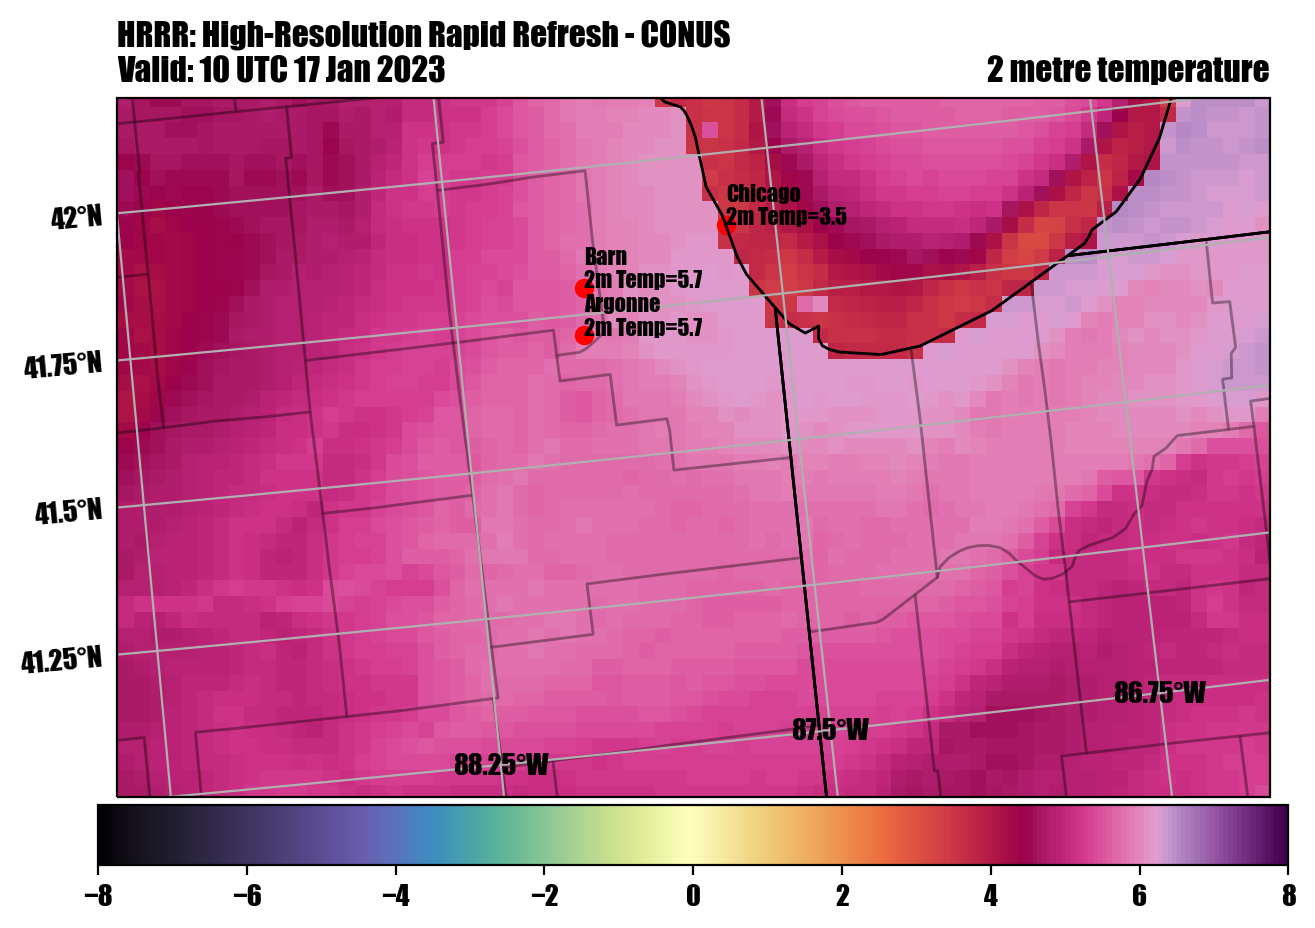

In [111]:
mov_custom.preview(-1)

In [112]:
mov_custom.save(
    'hrrr.mov',
    overwrite_existing=True,framerate=5)

Movie created at hrrr.mov


In [121]:
#This is a very annoying kluge to get around the browser caching issue 
__counter__ = random.randint(0,2e9)

oname = './hrrr%d.gif' %__counter__
xmovie.core.convert_gif('./hrrr.mov', 
                        resolution=[2000, 1000], 
                        remove_movie=False,
                       gpath=oname,
                       gif_palette=False)

HTML('<img src="./hrrr%d.gif">' %__counter__)

GIF created at ./hrrr1879923133.gif
